In [33]:
import pandas as pd
import numpy as np

In [34]:
aqi_data = pd.read_csv('AQI and Lat Long of Countries.csv')

In [35]:
aqi_data.head(5)

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833


In [36]:
aqi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16393 non-null  object 
 1   City                16695 non-null  object 
 2   AQI Value           16695 non-null  int64  
 3   AQI Category        16695 non-null  object 
 4   CO AQI Value        16695 non-null  int64  
 5   CO AQI Category     16695 non-null  object 
 6   Ozone AQI Value     16695 non-null  int64  
 7   Ozone AQI Category  16695 non-null  object 
 8   NO2 AQI Value       16695 non-null  int64  
 9   NO2 AQI Category    16695 non-null  object 
 10  PM2.5 AQI Value     16695 non-null  int64  
 11  PM2.5 AQI Category  16695 non-null  object 
 12  lat                 16695 non-null  float64
 13  lng                 16695 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.8+ MB


In [37]:
import matplotlib .pyplot as plt
import seaborn as sns


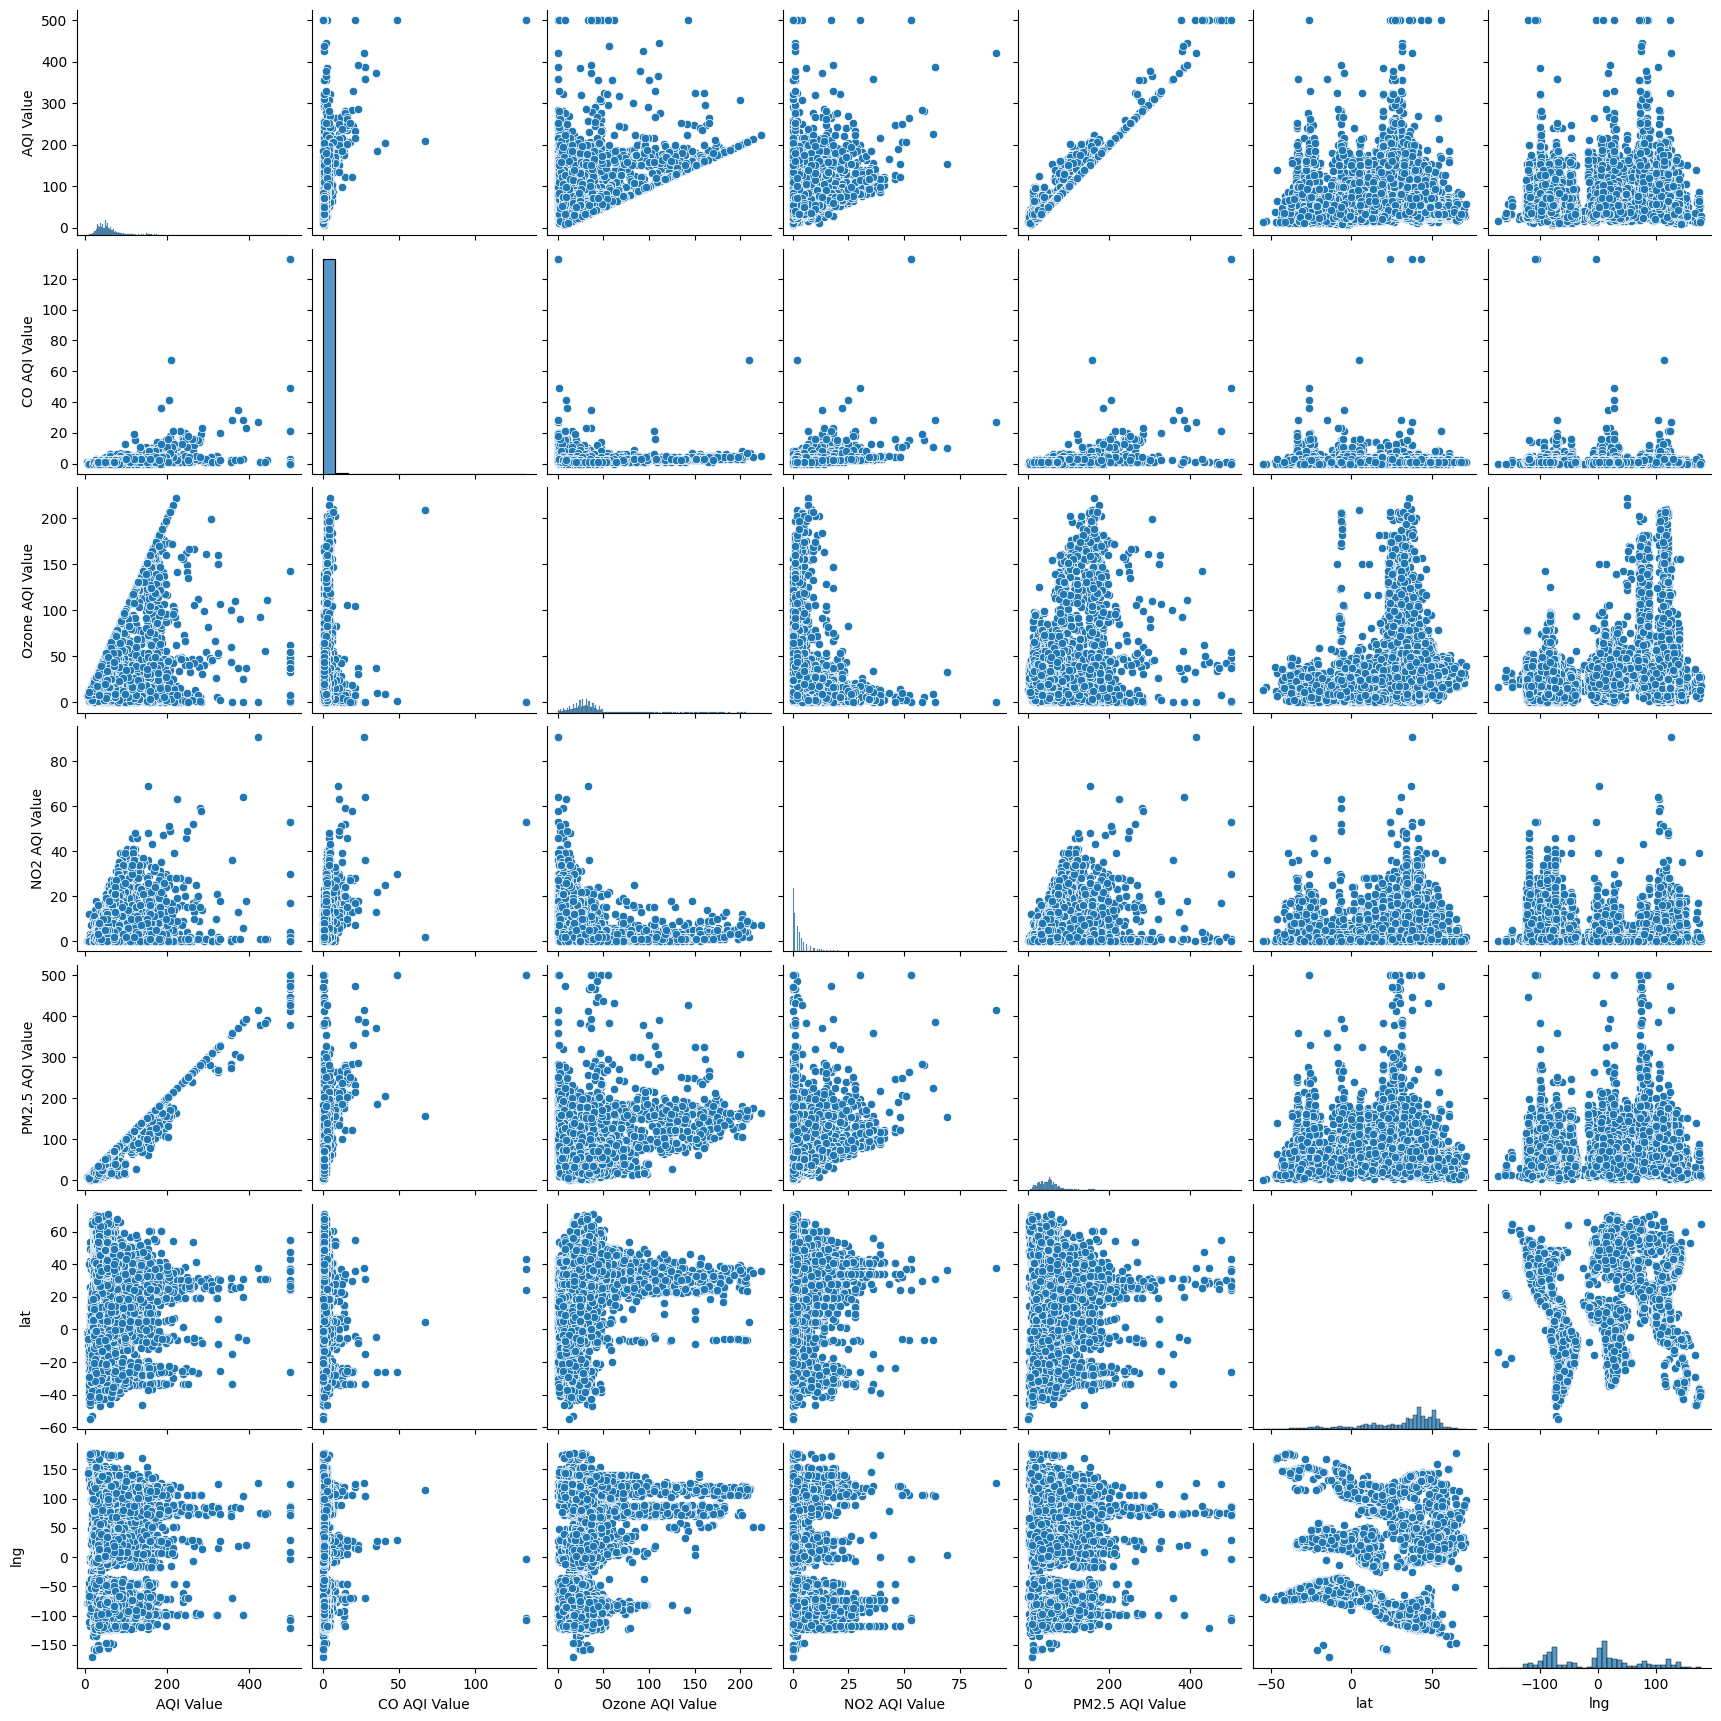

In [38]:
sns.pairplot(aqi_data)


In [39]:
rows_with_missing_values = aqi_data.isnull().any(axis=1).sum()
print(f'Rows with missing values: {rows_with_missing_values}')

Rows with missing values: 302


In [40]:
# Remove rows with any missing values
aqi_data = aqi_data.dropna()
print(aqi_data.isnull().sum()) 

Country               0
City                  0
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
lat                   0
lng                   0
dtype: int64


In [41]:
#Clean up column names by removing spaces
aqi_data.columns = aqi_data.columns.str.replace(' ', '_')

In [42]:
aqi_data.columns.values.tolist()

['Country',
 'City',
 'AQI_Value',
 'AQI_Category',
 'CO_AQI_Value',
 'CO_AQI_Category',
 'Ozone_AQI_Value',
 'Ozone_AQI_Category',
 'NO2_AQI_Value',
 'NO2_AQI_Category',
 'PM2.5_AQI_Value',
 'PM2.5_AQI_Category',
 'lat',
 'lng']

In [43]:
numeric_df = aqi_data.select_dtypes(include=['float64', 'int64'])

correlation_matrix =numeric_df.corr()
correlation_matrix

,AQI_Value,CO_AQI_Value,Ozone_AQI_Value,NO2_AQI_Value,PM2.5_AQI_Value,lat,lng
AQI_Value,1.000000,0.458529,0.328959,0.308275,0.980604,-0.101673,0.155514
CO_AQI_Value,0.458529,1.000000,0.039960,0.398974,0.458980,-0.077734,0.003489
Ozone_AQI_Value,0.328959,0.039960,1.000000,-0.252301,0.234705,0.247768,0.323898
NO2_AQI_Value,0.308275,0.398974,-0.252301,1.000000,0.340821,0.038933,-0.290050
PM2.5_AQI_Value,0.980604,0.458980,0.234705,0.340821,1.000000,-0.127804,0.118152
lat,-0.101673,-0.077734,0.247768,0.038933,-0.127804,1.000000,-0.021740
lng,0.155514,0.003489,0.323898,-0.290050,0.118152,-0.021740,1.000000


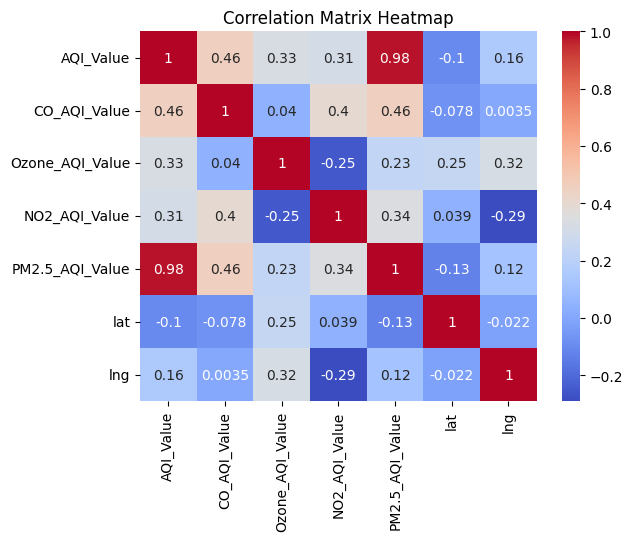

In [44]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [45]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in ['Country', 'City', 'AQI_Category', 'CO_AQI_Category', 'Ozone_AQI_Category', 'NO2_AQI_Category', 'PM2.5_AQI_Category']:
    le = LabelEncoder()
    aqi_data[column] = le.fit_transform(aqi_data[column])
    label_encoders[column] = le


C:\Users\muham\AppData\Local\Temp\ipykernel_9196\3118255887.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aqi_data[column] = le.fit_transform(aqi_data[column])
C:\Users\muham\AppData\Local\Temp\ipykernel_9196\3118255887.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aqi_data[column] = le.fit_transform(aqi_data[column])
C:\Users\muham\AppData\Local\Temp\ipykernel_9196\3118255887.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [46]:
aqi_data.head(10)

,Country,City,AQI_Value,AQI_Category,CO_AQI_Value,CO_AQI_Category,Ozone_AQI_Value,Ozone_AQI_Category,NO2_AQI_Value,NO2_AQI_Category,PM2.5_AQI_Value,PM2.5_AQI_Category,lat,lng
0,130,9931,51,2,1,0,36,0,0,0,51,2,44.7444,44.2031
1,22,9945,41,0,1,0,5,0,1,0,41,0,-5.2900,-44.4900
2,22,9945,41,0,1,0,5,0,1,0,41,0,-11.2958,-41.9869
3,75,9967,66,2,1,0,39,0,2,0,66,2,37.1667,15.1833
4,123,9987,34,0,1,0,34,0,0,0,20,0,53.0167,20.8833
5,166,10039,54,2,1,0,14,0,11,0,54,2,16.1005,-88.8074
6,166,10039,54,2,1,0,14,0,11,0,54,2,26.8941,-82.0513
7,15,10059,64,2,1,0,29,0,7,0,64,2,51.0761,4.2803
8,130,10064,54,2,1,0,41,0,1,0,54,2,44.0500,43.0667
9,33,10081,68,2,2,0,68,1,1,0,58,2,21.9500,108.6167


In [47]:
#feature scaling
features = ['CO_AQI_Value', 'Ozone_AQI_Value', 'NO2_AQI_Value', 'PM2.5_AQI_Value']
X = aqi_data[features]

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [49]:
#actual labels or targets
Y_reg = aqi_data['AQI_Value']
Y_class = aqi_data['AQI_Category']

In [50]:
#spliting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_reg_train,Y_reg_test,Y_class_train,Y_class_test=train_test_split(X_scaled,Y_reg,Y_class, test_size=0.2,random_state=42)

In [51]:
#Model Building

#Predict AQI Value using Linear Regression
from sklearn.linear_model import LinearRegression
ModelLr = LinearRegression()
ModelLr.fit(X_train, Y_reg_train)
reg_predictions =ModelLr.predict(X_test)

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report, confusion_matrix
print("Linear Regression Model Evaluation (AQI Value Prediction):")
print("Mean Absolute Error:", mean_absolute_error(Y_reg_test, reg_predictions))
print("Mean Squared Error:", mean_squared_error(Y_reg_test, reg_predictions))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(Y_reg_test, reg_predictions)))
print("R² Score:", r2_score(Y_reg_test, reg_predictions))
print("Accuracy: {:.3f} " .format(ModelLr.score(X_test,Y_reg_test)))

Linear Regression Model Evaluation (AQI Value Prediction):
Mean Absolute Error: 4.480194172441436
Mean Squared Error: 57.2423997473662
Root Mean Squared Error: 7.565870719710071
R² Score: 0.9688771689376041
Accuracy: 0.969 


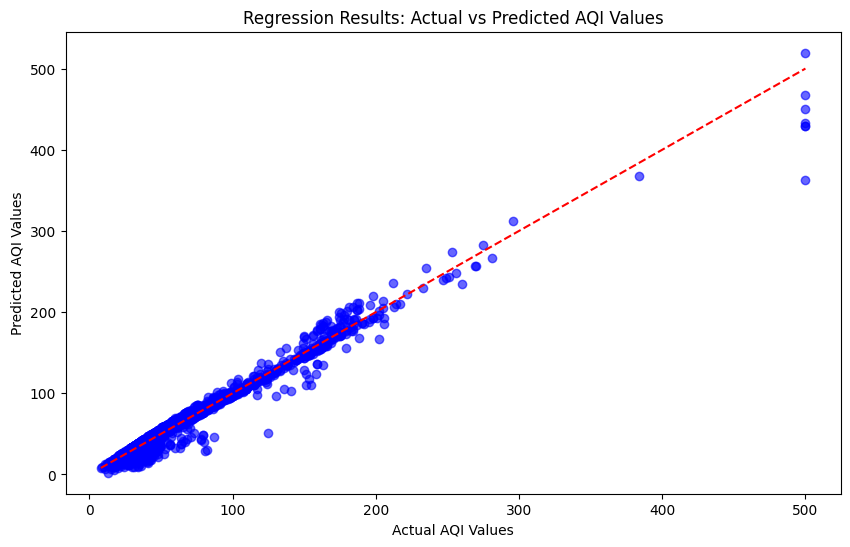

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_reg_test, reg_predictions, alpha=0.6, color='blue')
plt.plot([min(Y_reg_test), max(Y_reg_test)], [min(Y_reg_test), max(Y_reg_test)], color='red', linestyle='--')
plt.xlabel('Actual AQI Values')
plt.ylabel('Predicted AQI Values')
plt.title('Regression Results: Actual vs Predicted AQI Values')
plt.show()

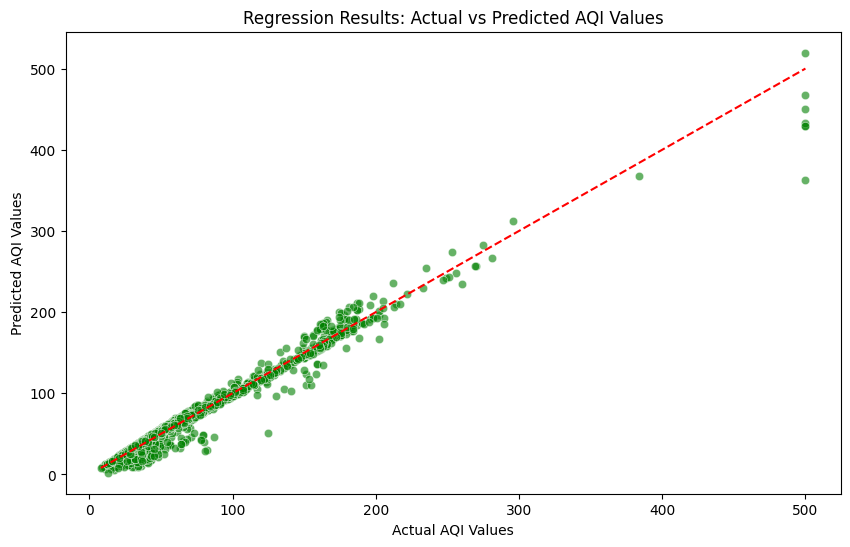

In [54]:


plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y_reg_test, y=reg_predictions, alpha=0.6, color='green')
plt.plot([min(Y_reg_test), max(Y_reg_test)], [min(Y_reg_test), max(Y_reg_test)], color='red', linestyle='--')
plt.xlabel('Actual AQI Values')
plt.ylabel('Predicted AQI Values')
plt.title('Regression Results: Actual vs Predicted AQI Values')
plt.show()


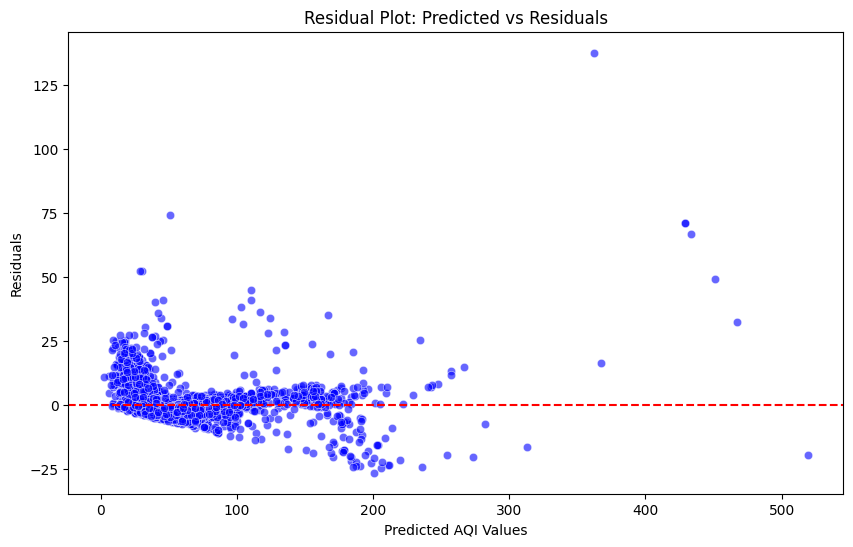

In [55]:

residuals = Y_reg_test - reg_predictions

plt.figure(figsize=(10, 6))
sns.scatterplot(x=reg_predictions, y=residuals, alpha=0.6, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted AQI Values')
plt.ylabel('Residuals')
plt.title('Residual Plot: Predicted vs Residuals')
plt.show()


In [56]:
from sklearn.ensemble import RandomForestClassifier
# Using RandomForestClassifier
Modelclassifier = RandomForestClassifier(n_estimators=100, random_state=42)
Modelclassifier.fit(X_train, Y_class_train)
Modelclassifier_predictions = Modelclassifier.predict(X_test)

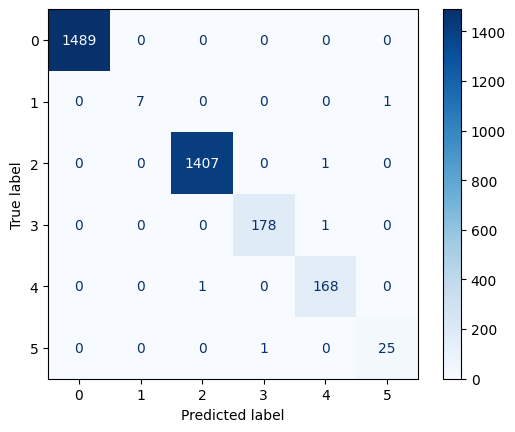

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_class_test, Modelclassifier_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

In [58]:
print("Classification Report:")
print(classification_report(Y_class_test, Modelclassifier_predictions))
print("Confusion Matrix:")
print(confusion_matrix(Y_class_test, Modelclassifier_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1489
           1       1.00      0.88      0.93         8
           2       1.00      1.00      1.00      1408
           3       0.99      0.99      0.99       179
           4       0.99      0.99      0.99       169
           5       0.96      0.96      0.96        26

    accuracy                           1.00      3279
   macro avg       0.99      0.97      0.98      3279
weighted avg       1.00      1.00      1.00      3279

Confusion Matrix:
[[1489    0    0    0    0    0]
 [   0    7    0    0    0    1]
 [   0    0 1407    0    1    0]
 [   0    0    0  178    1    0]
 [   0    0    1    0  168    0]
 [   0    0    0    1    0   25]]


In [59]:
print("Accuracy: {:.3f} " .format(Modelclassifier.score(X_test,Y_class_test)))

Accuracy: 0.998 


In [60]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, Y_reg_train)


Ridge()

In [61]:
print("Traning Score: {: 2f}".format(ridge_model.score(X_train, Y_reg_train)))
print("Testing Score: {: 2f}".format(ridge_model.score(X_test, Y_reg_test)))

Traning Score:  0.973073
Testing Score:  0.968877


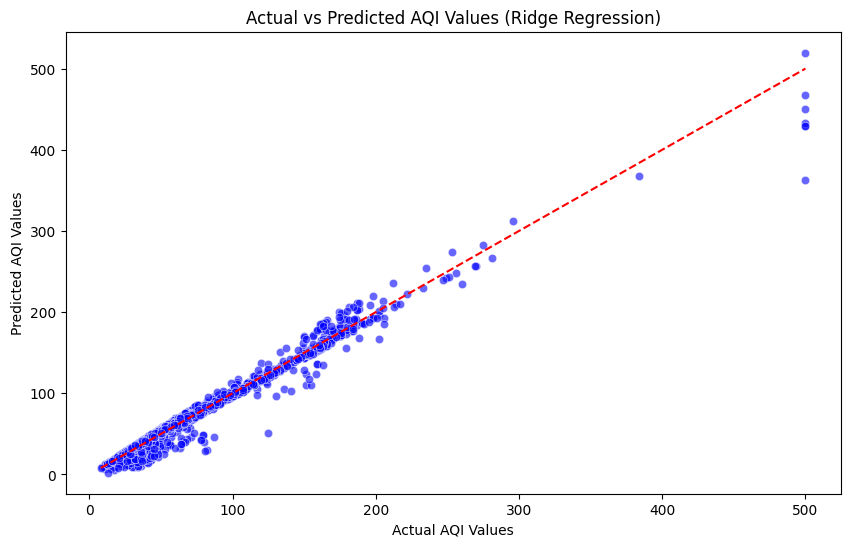

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions using the trained model
Y_pred = ridge_model.predict(X_test)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y_reg_test, y=Y_pred, alpha=0.6, color='blue')
plt.plot([min(Y_reg_test), max(Y_reg_test)], [min(Y_reg_test), max(Y_reg_test)], color='red', linestyle='--')
plt.xlabel('Actual AQI Values')
plt.ylabel('Predicted AQI Values')
plt.title('Actual vs Predicted AQI Values (Ridge Regression)')
plt.show()


In [63]:
import joblib
import os
if not os.path.exists('Linear_reg_Model'):
   os.mkdir('Linear_reg_Model')
if not os.path.exists('Classifier_Model'):
   os.mkdir('Classifier_Model')
if not os.path.exists('Scaler'):
   os.mkdir('Scaler')
if not os.path.exists('Encoder'):
   os.mkdir('Encoder')


In [64]:
joblib.dump(ModelLr, r'Linear_reg_Model/linear_regressor_model.pkl' )
joblib.dump(Modelclassifier, r'Classifier_Model/classifier_model.pkl' )
joblib.dump(scaler, r'Scaler/scaler.pkl' )
joblib.dump(label_encoders, r'Encoder/label_encoders.pkl' )

['Encoder/label_encoders.pkl']